In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import pickle
from tqdm import tqdm

import plotly.express as px
import plotly.graph_objects as go

%run ../functions.ipynb

## Parameters

In [3]:
fpath_out = '../../Service/BettiCurves/'

minDim = 0
maxDim = 3
nNodes = 90 
nTrials = 100

shortLength = 400

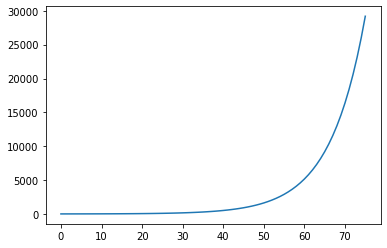

[    4     5     6     7     8     9    10    11    13    14    16    18
    20    23    25    29    32    36    40    45    51    57    64    72
    81    91   102   114   128   144   161   181   203   228   256   287
   323   362   406   456   512   575   645   724   813   912  1024  1149
  1290  1448  1625  1825  2048  2299  2580  2896  3251  3649  4096  4598
  5161  5793  6502  7298  8192  9195 10321 11585 13004 14596 16384 18390
 20643 23170 26008 29193]


In [4]:
lenSet = np.unique(np.array(np.round(2**np.arange(2,15,1/6)),dtype=int))
plt.plot(lenSet)
plt.show()
print(lenSet)

filename = fpath_out + 'lenSet'
outfile = open(filename,'wb')
pickle.dump(lenSet,outfile)
outfile.close()

## Random correlations

In [5]:
dataMark = 'RC'
corMatr = np.zeros((lenSet.shape[0],nNodes,nNodes))
with tqdm(total=lenSet.shape[0]) as pbar:
    for i in range(lenSet.shape[0]):
        pbar.update(1)
        dataCurrent = np.random.normal(size=(lenSet[i]+1,nNodes,1))
        corMatr[i] = connectivity(dataCurrent)

ordMatrix = orderMatrix(-corMatr)
N_betti_RC = computeBettiNumbers(ordMatrix,minDim,1)

filename = fpath_out + 'N_betti_' + dataMark + '_diffLen'
outfile = open(filename,'wb')
pickle.dump(N_betti_RC,outfile)
pickle.dump(lenSet,outfile)
outfile.close()


ordMatrix = orderMatrix(corMatr)
N_betti_RC = computeBettiNumbers(ordMatrix,minDim,1)

filename = fpath_out + 'N_betti_' + dataMark + '_diffLen_oppositeOrder'
outfile = open(filename,'wb')
pickle.dump(N_betti_RC,outfile)
pickle.dump(lenSet,outfile)
outfile.close()

Loading...: 100%|██████████| 76/76 [00:40<00:00,  1.88it/s]


In [6]:
corMatr = np.zeros((nTrials,nNodes,nNodes))
with tqdm(total=nTrials) as pbar:
    for i in range(nTrials):
        pbar.update(1)
        dataCurrent = np.random.normal(size=(shortLength+1,nNodes,1))
        corMatr[i] = connectivity(dataCurrent)

ordMatrix = orderMatrix(-corMatr)
N_betti_trials_RC = computeBettiNumbers(ordMatrix,minDim,maxDim)

filename = fpath_out + 'N_betti_' + dataMark + '_moreTrials'
outfile = open(filename,'wb')
pickle.dump(N_betti_trials_RC,outfile)
pickle.dump(lenSet,outfile)
outfile.close()


ordMatrix = orderMatrix(corMatr)
N_betti_trials_RC = computeBettiNumbers(ordMatrix,minDim,maxDim)

filename = fpath_out + 'N_betti_' + dataMark + '_moreTrials_oppositeOrder'
outfile = open(filename,'wb')
pickle.dump(N_betti_trials_RC,outfile)
pickle.dump(lenSet,outfile)
outfile.close()

Loading...: 100%|██████████| 100/100 [2:35:38<00:00, 93.38s/it]  


## Euclidean distance

In [8]:
dataMark = 'ED'
corMatr = np.zeros((lenSet.shape[0],nNodes,nNodes))
with tqdm(total=lenSet.shape[0]) as pbar:
    for i in range(lenSet.shape[0]):
        pbar.update(1)
        corMatr[i] = euclDistMatrix_single(nNodes, lenSet[i])

ordMatrix = orderMatrix(corMatr)    
N_betti_ED = computeBettiNumbers(ordMatrix,minDim,1)

filename = fpath_out + 'N_betti_' + dataMark + '_diffLen'
outfile = open(filename,'wb')
pickle.dump(N_betti_ED,outfile)
pickle.dump(lenSet,outfile)
outfile.close()



ordMatrix = orderMatrix(-corMatr)    
N_betti_ED = computeBettiNumbers(ordMatrix,minDim,1)

filename = fpath_out + 'N_betti_' + dataMark + '_diffLen_oppositeOrder'
outfile = open(filename,'wb')
pickle.dump(N_betti_ED,outfile)
pickle.dump(lenSet,outfile)
outfile.close()

Loading...: 100%|██████████| 76/76 [00:06<00:00, 11.49it/s]


In [9]:
corMatr = np.zeros((nTrials,nNodes,nNodes))
with tqdm(total=nTrials) as pbar:
    for i in range(nTrials):
        pbar.update(1)
        corMatr[i] = euclDistMatrix_single(nNodes, shortLength)

ordMatrix = orderMatrix(corMatr)    
N_betti_trials_ED = computeBettiNumbers(ordMatrix,minDim,maxDim)

filename = fpath_out + 'N_betti_' + dataMark + '_moreTrials'
outfile = open(filename,'wb')
pickle.dump(N_betti_trials_ED,outfile)
outfile.close()



ordMatrix = orderMatrix(-corMatr)    
N_betti_trials_ED = computeBettiNumbers(ordMatrix,minDim,maxDim)

filename = fpath_out + 'N_betti_' + dataMark + '_moreTrials_oppositeOrder'
outfile = open(filename,'wb')
pickle.dump(N_betti_trials_ED,outfile)
outfile.close()

Loading...: 100%|██████████| 100/100 [05:09<00:00,  3.10s/it]


## Spherical distance

In [10]:
dataMark = 'SD'
corMatr = np.zeros((lenSet.shape[0],nNodes,nNodes))
with tqdm(total=lenSet.shape[0]) as pbar:
    for i in range(lenSet.shape[0]):
        pbar.update(1)
        corMatr[i] = spherDistMatrix_single(nNodes, lenSet[i])

ordMatrix = orderMatrix(corMatr)    
N_betti_SD = computeBettiNumbers(ordMatrix,minDim,1)

filename = fpath_out + 'N_betti_' + dataMark + '_diffLen'
outfile = open(filename,'wb')
pickle.dump(N_betti_SD,outfile)
pickle.dump(lenSet,outfile)
outfile.close()



ordMatrix = orderMatrix(-corMatr)    
N_betti_SD = computeBettiNumbers(ordMatrix,minDim,1)

filename = fpath_out + 'N_betti_' + dataMark + '_diffLen_oppositeOrder'
outfile = open(filename,'wb')
pickle.dump(N_betti_SD,outfile)
pickle.dump(lenSet,outfile)
outfile.close()

Loading...: 100%|██████████| 76/76 [00:36<00:00,  2.05it/s]


In [11]:
corMatr = np.zeros((nTrials,nNodes,nNodes))
with tqdm(total=nTrials) as pbar:
    for i in range(nTrials):
        pbar.update(1)
        corMatr[i] = spherDistMatrix_single(nNodes, shortLength)

ordMatrix = orderMatrix(corMatr)    
N_betti_trials_SD = computeBettiNumbers(ordMatrix,minDim,maxDim)

filename = fpath_out + 'N_betti_' + dataMark + '_moreTrials'
outfile = open(filename,'wb')
pickle.dump(N_betti_trials_SD,outfile)
outfile.close()


ordMatrix = orderMatrix(-corMatr)    
N_betti_trials_SD = computeBettiNumbers(ordMatrix,minDim,maxDim)

filename = fpath_out + 'N_betti_' + dataMark + '_moreTrials_oppositeOrder'
outfile = open(filename,'wb')
pickle.dump(N_betti_trials_SD,outfile)
outfile.close()

Loading...: 100%|██████████| 100/100 [2:21:44<00:00, 85.04s/it]  


## Hyperbolic distance

In [12]:
# Correct distribution, different dimensions
dataMark = 'HD'

Rset = np.array([0.1, 1, 4, 5, 10])

for R in Rset:
    print(R)
    corMatr = np.zeros((lenSet.shape[0],nNodes,nNodes))
    with tqdm(total=lenSet.shape[0]) as pbar:
        for i in range(lenSet.shape[0]):
            pbar.update(1)
            corMatr[i] = hyperbDistMatrix_single(nNodes, lenSet[i], 'UniOnHyper', R)


    ordMatrix = orderMatrix(corMatr)    
    N_betti_HD = computeBettiNumbers(ordMatrix,minDim,1)

    filename = fpath_out + 'N_betti_' + dataMark + '_diffLen' + '_R' + str(R)
    outfile = open(filename,'wb')
    pickle.dump(N_betti_HD,outfile)
    pickle.dump(lenSet,outfile)
    outfile.close()


    ordMatrix = orderMatrix(-corMatr)    
    N_betti_HD = computeBettiNumbers(ordMatrix,minDim,1)

    filename = fpath_out + 'N_betti_' + dataMark + '_diffLen' + '_R' + str(R) + '_oppositeOrder'
    outfile = open(filename,'wb')
    pickle.dump(N_betti_HD,outfile)
    pickle.dump(lenSet,outfile)
    outfile.close()    

  3%|▎         | 2/76 [00:00<00:05, 13.20it/s]

0.1


  3%|▎         | 2/76 [00:00<00:05, 14.29it/s]

1.0


  3%|▎         | 2/76 [00:00<00:05, 13.77it/s]

4.0


  3%|▎         | 2/76 [00:00<00:05, 14.27it/s]

5.0


  3%|▎         | 2/76 [00:00<00:05, 13.69it/s]

10.0


Loading...: 100%|██████████| 76/76 [00:06<00:00, 12.39it/s]


In [13]:
for R in Rset:
    print(R)

    corMatr = np.zeros((nTrials,nNodes,nNodes))
    with tqdm(total=nTrials) as pbar:
        for i in range(nTrials):
            pbar.update(1)
            corMatr[i] = hyperbDistMatrix_single(nNodes, shortLength, 'UniOnHyper', R)

    ordMatrix = orderMatrix(corMatr)    
    N_betti_trials_HD = computeBettiNumbers(ordMatrix,minDim,maxDim)

    filename = fpath_out + 'N_betti_' + dataMark + '_moreTrials' + '_R' + str(R)
    outfile = open(filename,'wb')
    pickle.dump(N_betti_trials_HD,outfile)
    outfile.close()



    ordMatrix = orderMatrix(-corMatr)    
    N_betti_trials_HD = computeBettiNumbers(ordMatrix,minDim,maxDim)

    filename = fpath_out + 'N_betti_' + dataMark + '_moreTrials' + '_R' + str(R) + '_oppositeOrder'
    outfile = open(filename,'wb')
    pickle.dump(N_betti_trials_HD,outfile)
    outfile.close()

  2%|▏         | 2/100 [00:00<00:08, 11.63it/s]

0.1


  0%|          | 0/100 [00:00<?, ?it/s]

1.0


  0%|          | 0/100 [00:00<?, ?it/s]

4.0


  0%|          | 0/100 [00:00<?, ?it/s]

5.0


  2%|▏         | 2/100 [00:00<00:08, 11.45it/s]

10.0


Loading...: 100%|██████████| 100/100 [04:32<00:00,  2.73s/it]


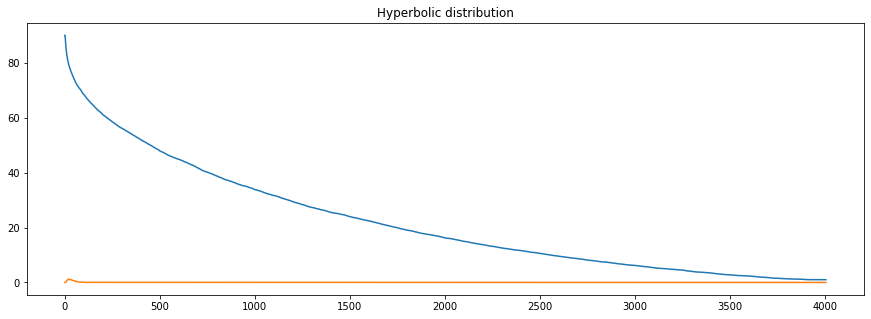

10.0


In [14]:
N_betti = N_betti_trials_HD
plt.figure(figsize=(15,5))
plt.title('Hyperbolic distribution')
plt.plot(np.mean(N_betti['Betti0'],1))
plt.plot(np.mean(N_betti['Betti1'],1))
plt.show()

print(np.max(N_betti['Betti1']))

## Random graph

In [15]:
dataMark = 'RG'
corMatr = np.zeros((lenSet.shape[0],nNodes,nNodes))
with tqdm(total=lenSet.shape[0]) as pbar:
    for i in range(lenSet.shape[0]):
        pbar.update(1)
        corMatr[i] = shuffleMatrix_single(nNodes)

ordMatrix = orderMatrix(corMatr)    
N_betti_RG = computeBettiNumbers(ordMatrix,minDim,1)

filename = fpath_out + 'N_betti_' + dataMark + '_diffLen'
outfile = open(filename,'wb')
pickle.dump(N_betti_RG,outfile)
outfile.close()


ordMatrix = orderMatrix(-corMatr)    
N_betti_RG = computeBettiNumbers(ordMatrix,minDim,1)

filename = fpath_out + 'N_betti_' + dataMark + '_diffLen_oppositeOrder'
outfile = open(filename,'wb')
pickle.dump(N_betti_RG,outfile)
outfile.close()

Loading...: 100%|██████████| 76/76 [00:12<00:00,  6.25it/s]


In [16]:
corMatr = np.zeros((nTrials,nNodes,nNodes))
with tqdm(total=nTrials) as pbar:
    for i in range(nTrials):
        pbar.update(1)
        corMatr[i] = shuffleMatrix_single(nNodes)

ordMatrix = orderMatrix(corMatr)    
N_betti_trials_RG = computeBettiNumbers(ordMatrix,minDim,maxDim)

filename = fpath_out + 'N_betti_' + dataMark + '_moreTrials'
outfile = open(filename,'wb')
pickle.dump(N_betti_trials_RG,outfile)
outfile.close()


ordMatrix = orderMatrix(-corMatr)    
N_betti_trials_RG = computeBettiNumbers(ordMatrix,minDim,maxDim)

filename = fpath_out + 'N_betti_' + dataMark + '_moreTrials_oppositeOrder'
outfile = open(filename,'wb')
pickle.dump(N_betti_trials_RG,outfile)
outfile.close()

Loading...: 100%|██████████| 100/100 [56:14<00:00, 33.74s/it] 
